In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
df = pd.read_excel('Datasetforphishing Contd.xlsx')

In [3]:
# Filter out columns that start with 'Unnamed'
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
df.head()

,Label,Contents,Links,Sender Name,Subject,Sender Email
0,not_spam,Your subscription to Microsoft 365 Family has ...,NaN,Microsoft,Your subscription to Microsoft 365 Family has ...,microsoft-noreply@microsoft.com
1,not_spam,Udemy Logo\n\nRecommended topics for you:\nCom...,NaN,\nUdemy,We’ve got some new IT & Software course recomm...,hello@students.udemy.com
2,spam,https://drive.google.com/file/d/1gFnGbalxwhaX...,https://drive.google.com/file/d/1gFnGbalxwhaXt...,\nBinh Mr,Balance will be deleted 0.643253 ETH,mrbinh03@gmail.com
3,not_spam,Microsoft account\nNew app(s) have access to y...,NaN,Microsoft account team,New app(s) connected to your Microsoft account,account-security-noreply@accountprotection.mic...
4,not_spam,"With regard to the softs curves development , ...",http://parcplace.com,\nFirstbase Place,Save $80 on incorporation with promo code SPEC...,arya_wayne@gmail.com


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         402 non-null    object
 1   Contents      402 non-null    object
 2   Links         143 non-null    object
 3   Sender Name   383 non-null    object
 4   Subject       393 non-null    object
 5   Sender Email  401 non-null    object
dtypes: object(6)
memory usage: 19.0+ KB


In [5]:
df.describe()

,Label,Contents,Links,Sender Name,Subject,Sender Email
count,402,402,143,383,393,401
unique,2,396,120,281,341,277
top,not_spam,"Transaction Alert: Dear Olawunmi, Guaranty Tr...",https://intelligentcryptocurrency.com/vip,Kuda,Transaction Notification,hello@students.udemy.com
freq,263,2,4,10,9,13


In [6]:
def showSpamClassficationDist(df):
    # Visualizing the distribution of the 'label' column
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Label', data= df)
    plt.title('Email classification distribution')
    plt.show()
    
#def merge(q : tuple):
#    return q[0] + "\n" + q[1] + "\n" + q[2] + "\n" + q[3]

def arrange(df):
    l = []
    for i in range(len(df)):  # iterate through the DataFrame rows
        try:
            c = str(df['Contents'][i])
            #sn = str(df['Sender Name'][i])
            #se = str(df['Sender Email'][i])
            #s = str(df['Subject'][i])
            #l.append(sn+"\n"+se+"\n"+s+"\n"+c)
            #l.append(s+"\n"+c)
            l.append(c)
        except TypeError:
            print (f'Error processing row {i}')
    la = df['Label']
    df2 = pd.DataFrame(zip(la, l), columns=['Label', 'Contents'])
    return df2

Total missing values Label             0
Contents          0
Links           259
Sender Name      19
Subject           9
Sender Email      1
dtype: int64


/var/folders/l5/44cdf79173j5gfy0cg2f5xnh0000gn/T/ipykernel_30015/1059583968.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Contents'].fillna('', inplace=True)


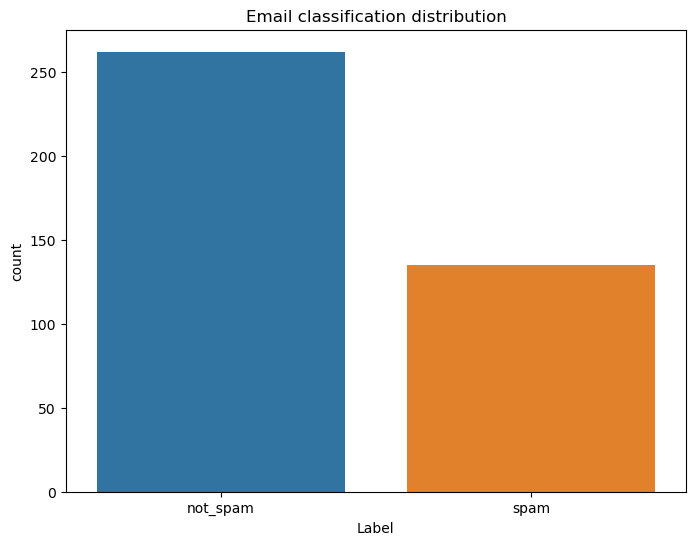

In [7]:
# Checking for missing values
print(f"Total missing values {df.isnull().sum()}")

# Select the 'Label' and 'Contents' columns
#df = df[['Label', 'Contents', 'Sender Name', 'Sender Email', 'Subject']]
df['Contents'].astype(str)
df['Sender Name'].astype(str)
df['Sender Email'].astype(str)
df['Subject'].astype(str)

#contents_col = [merge(q) for q in zip(df['Sender Name'], df['Sender Email'], df['Subject'], df['Contents'])]
df = arrange(df)
#df = pd.DataFrame(zip(df['Label'], contents_col), columns = ['Label', 'Contents'])

# Drop duplicates
df = df.drop_duplicates()

# Drop missing values
df.dropna(inplace=True)

df['Contents'].fillna('', inplace=True)

df['Contents'].astype(str)


showSpamClassficationDist(df)

#df['content'] = df['Contents'].apply(preprocess_text)
#zz = df['Contents'] 
#yy = df['Category']

# Apply CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Contents'])
#print(df['Label'])

y = df['Label'].map({'spam': 1, 'not_spam': 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(y)

In [8]:


# Train the models
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate the models
# SVM
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

# Print the evaluation results
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(svm_report)

SVM Accuracy: 0.8375
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        58
           1       0.91      0.45      0.61        22

    accuracy                           0.84        80
   macro avg       0.87      0.72      0.75        80
weighted avg       0.85      0.84      0.82        80



In [9]:
report_dict =classification_report(y_test, svm_pred, output_dict=True)
report_dict

{'0': {'precision': 0.8260869565217391,
  'recall': 0.9827586206896551,
  'f1-score': 0.8976377952755905,
  'support': 58},
 '1': {'precision': 0.9090909090909091,
  'recall': 0.45454545454545453,
  'f1-score': 0.6060606060606061,
  'support': 22},
 'accuracy': 0.8375,
 'macro avg': {'precision': 0.8675889328063241,
  'recall': 0.7186520376175548,
  'f1-score': 0.7518492006680983,
  'support': 80},
 'weighted avg': {'precision': 0.8489130434782609,
  'recall': 0.8375,
  'f1-score': 0.8174540682414697,
  'support': 80}}

In [10]:
import mlflow

In [12]:
mlflow.set_experiment("First Experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
with mlflow.start_run():
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score']
    })
    mlflow.sklearn.log_model(svm_model, "SVM")

2024/10/04 14:47:05 INFO mlflow.tracking.fluent: Experiment with name 'First Experiment' does not exist. Creating a new experiment.
2024/10/04 14:47:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/04 14:47:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run selective-cow-625 at: http://127.0.0.1:5000/#/experiments/682285535778217075/runs/de0092e6780545aea3df5777bd044586.
2024/10/04 14:47:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/682285535778217075.


In [ ]:
model_uri = f"runs:
result = mlflow.register_model(
    
    "runs:/d16076a3ec534311817565e6527539c0/sklearn-model", "sk-learn-random-forest-reg"
)
